In [6]:
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import data (flights january, november, december and flight_test)

In [7]:
df_nov_dec = pd.read_csv("data/flights_2019_nov_dec.csv")
df_jan = pd.read_csv("data/flights_2019_jan_raw.csv")
df_weather = pd.read_csv("data/WeatherEvents_2018_2020.csv")
df_passengers = pd.read_csv("data/passengers_nov_dec_jan_raw.csv")
df_fuel = pd.read_csv("data/fuel_comsumption_2018.csv")

In [8]:
# Flights df
df = pd.concat([df_nov_dec, df_jan]).reset_index().drop(columns=["index"])

In [27]:
flights_raw = df.copy()

### NA Values fixing

In [28]:
# make DF with delay columns for referencing
df_delays = pd.DataFrame()
df_delays = flights_raw[["carrier_delay","weather_delay","nas_delay","security_delay","late_aircraft_delay","arr_delay"]]

In [29]:
# Null value function
def missing(x):
    n_missing = x.isnull().sum().sort_values(ascending=False)
    p_missing = (x.isnull().sum()/x.isnull().count()).sort_values(ascending=False)
    missing_ = pd.concat([n_missing, p_missing],axis=1, keys = ['number','percent'])
    missing_ = missing_[missing_["percent"] > 0]
    return missing_

In [32]:
# Fill na function
def fill_columns(fill,columns,df):
    for col in columns:
        df[col].fillna(fill,inplace=True)

In [30]:
missing(flights_raw)

,number,percent
no_name,2644325,1.000000
total_add_gtime,2627839,0.993766
first_dep_time,2627838,0.993765
longest_add_gtime,2627838,0.993765
cancellation_code,2605974,0.985497
late_aircraft_delay,2178457,0.823823
security_delay,2178457,0.823823
nas_delay,2178457,0.823823
weather_delay,2178457,0.823823
carrier_delay,2178457,0.823823


In [31]:
flights_raw = flights_raw.drop(columns = ['no_name', 
                                          'longest_add_gtime',
                                          'total_add_gtime',
                                          'cancelled','diverted',
                                          'first_dep_time',
                                          'cancellation_code',
                                          'tail_num'],axis=1)

In [40]:
columns = ['late_aircraft_delay',
           'security_delay',
           'nas_delay',
           'weather_delay',
           'crs_elapsed_time',
           'carrier_delay',
           'dep_delay',
           'arr_delay']
fill_columns(0,columns,flights_raw)

In [37]:
# Drop no air_time values
flights_raw.drop(flights_raw.loc[flights_raw['air_time'].isnull()].index,inplace=True)

In [41]:
missing(flights_raw) # good to go.

,number,percent


# Save cleaned flights data to CSV

In [42]:
#Export the cleaned dataframe
flights_raw.to_csv('data/flights_cleaned_with_delays.csv')

## Mapping airport/airline names for plotting

In [62]:
# # Mapping file for airport names
# import json
# with open('airport_names_dict.txt') as f: # my map
#     data = f.read()
# airport_names_dict = json.loads(data)

In [63]:
# # Adding new column with full airport names
# df["airport_names"] = df["origin"]
# df["airport_names"] = df['airport_names'].map(airport_names_dict) 

In [64]:
# # Mapping file for airline names
# import json
# with open('airline_names_dict.txt') as f: # my map
#     data2 = f.read()
# airline_names_dict = json.loads(data2)

In [65]:
# # Adding new column with full airline names
# df["airline_names"] = df["mkt_carrier"]
# df["airline_names"] = df['airline_names'].map(airline_names_dict) 

# Outlier removal

In [45]:
Q1_arrival = flights_raw.arr_delay.quantile(0.25)
Q3_arrival = flights_raw.arr_delay.quantile(0.75)
IQR = Q3_arrival - Q1_arrival
flights_no_outlier_iqr = flights_raw.loc[(flights_raw['arr_delay'] >= (Q1_arrival - 1.5*IQR))\
                                     & (flights_raw['arr_delay'] <= Q3_arrival + 1.5*IQR)]

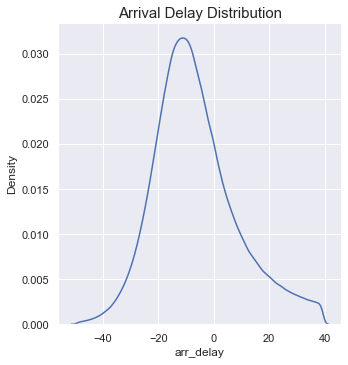

In [46]:
# Arrival Delay Distribution after excluding the outliers
sns.set_theme(style="darkgrid")
sns.displot(flights_no_outlier_iqr, x="arr_delay",kind='kde')
plt.title("Arrival Delay Distribution", size=15)
plt.show()

In [47]:
# Removing outliers for departure delay
Q1_dep = flights_no_outlier_iqr.dep_delay.quantile(0.25)
Q3_dep = flights_no_outlier_iqr.dep_delay.quantile(0.75)
IQR_dep = Q3_dep - Q1_dep
flights_no_outlier_iqr = flights_no_outlier_iqr.loc[(flights_no_outlier_iqr['dep_delay'] >= (Q1_dep - 1.5*IQR_dep))\
                                     & (flights_no_outlier_iqr['dep_delay'] <= Q3_dep + 1.5*IQR_dep)]

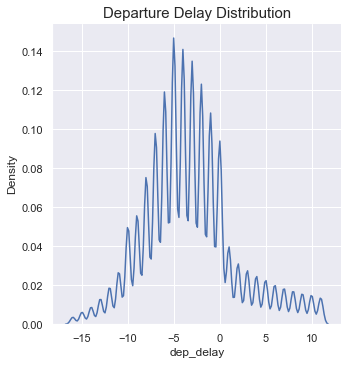

In [48]:
sns.set_theme(style="darkgrid")
sns.displot(flights_no_outlier_iqr, x="dep_delay",kind='kde')
plt.title("Departure Delay Distribution", size=15)
plt.show()

In [49]:
flights_no_outlier_iqr.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019-10-02,AA,AA_CODESHARE,AA,5330,OH,5330,10581,BGR,"Bangor, ME",11278,DCA,"Washington, DC",543,535.0,-8.0,11.0,546.0,726.0,5.0,749,731.0,-18.0,N,126.0,116.0,100.0,1.0,590.0,0.0,0.0,0.0,0.0,0.0
1,2019-10-02,AA,AA_CODESHARE,AA,5332,OH,5332,10599,BHM,"Birmingham, AL",11057,CLT,"Charlotte, NC",1844,1853.0,9.0,19.0,1912.0,2119.0,11.0,2127,2130.0,3.0,N,103.0,97.0,67.0,1.0,350.0,0.0,0.0,0.0,0.0,0.0
3,2019-10-02,AA,AA_CODESHARE,AA,5333,OH,5333,10397,ATL,"Atlanta, GA",11057,CLT,"Charlotte, NC",1354,1346.0,-8.0,31.0,1417.0,1503.0,14.0,1519,1517.0,-2.0,N,85.0,91.0,46.0,1.0,226.0,0.0,0.0,0.0,0.0,0.0
4,2019-10-02,AA,AA_CODESHARE,AA,5333,OH,5333,11057,CLT,"Charlotte, NC",10397,ATL,"Atlanta, GA",1155,1148.0,-7.0,33.0,1221.0,1258.0,6.0,1320,1304.0,-16.0,N,85.0,76.0,37.0,1.0,226.0,0.0,0.0,0.0,0.0,0.0
5,2019-10-02,AA,AA_CODESHARE,AA,5334,OH,5334,11057,CLT,"Charlotte, NC",12339,IND,"Indianapolis, IN",1450,1443.0,-7.0,19.0,1502.0,1606.0,8.0,1632,1614.0,-18.0,N,102.0,91.0,64.0,1.0,427.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# Add delays to column named combined_delay
columns = ['late_aircraft_delay','security_delay','nas_delay','weather_delay','carrier_delay']
flights_no_outlier_iqr['combined_delay'] = 0
for col in columns:
    flights_no_outlier_iqr['combined_delay'] = flights_no_outlier_iqr['combined_delay']+flights_no_outlier_iqr[col]

In [51]:
flights_no_outlier_iqr['combined_delay'].sort_values(ascending=False)

550988     39.0
579418     39.0
116253     39.0
1977023    39.0
579525     39.0
           ... 
869021      0.0
869020      0.0
869017      0.0
869015      0.0
1276477     0.0
Name: combined_delay, Length: 2073401, dtype: float64

In [52]:
flights_no_outlier_iqr.shape

(2073401, 35)

In [53]:
flights_no_outlier_iqr.to_csv('data/flights_cleaned_no_outlier_iqr_with_delays.csv')